<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M1_Clustering_v6_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Methods: Hierarchical vs. K-means Clustering Techniques

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/nba_Clustering_yale.png" width="800" height="800">


[Clustering NBA Players](https://sports.sites.yale.edu/clustering-nba-players)


- **Partitioning (Centroid-based) Methods:** This method divides data into a set number of groups so that items in each group are as similar as possible. K-means is a popular way to do this.

- **Hierarchical Methods:** This method sorts data into groups in a tree-like shape, using how close or far the items are from each other.

- **Density-based Methods:** This method puts data points into groups based on how many are packed closely together. DBSCAN and OPTICS are common ways to do density-based clustering.

![](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/clustering_methods.png)






In [1]:
import pandas as pd

nba = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/NBA_Data.csv')

# **1. Agglomerative Approach: A Bottom-Up Perspective on Hierarchical Clustering**

This method sorts data into groups in a tree-like shape. It can work either bottom-up, starting with individual items and combining them, or top-down, starting with one big group and splitting it.





1. Bottom-Up Clustering: Starts with individual items and combines them into bigger groups step-by-step.

2. Top-Down Clustering: Begins with one large group and splits it into smaller groups step-by-step.

![](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/agglomerative_clustering.jpeg)

 Bottom-up approach cotains three steps in hierarchical clustering as follows:


> - **Step 1: Calcaulte the similarity matrix between all pairs of players**
> - **Step 2: Find and merge the nearest pairs of players**
> - **Step 3: Keep doing this until all the players end up in one big group**


You start with each player as their own group and then keep combining the most similar players until everyone is in one big group.

In [2]:
sample_nba = nba.iloc[:7, :][['PLAYER', 'PTS', 'REB']]
sample_nba

,PLAYER,PTS,REB
0,James Harden,36.1,6.6
1,Paul George,28.0,8.2
2,Giannis Antetokounmpo,27.7,12.5
3,Joel Embiid,27.5,13.6
4,LeBron James,27.4,8.5
5,Stephen Curry,27.3,5.3
6,Kawhi Leonard,26.6,7.3


In [3]:
sample_nba[['PTS', 'REB']].values

array([[36.1,  6.6],
       [28. ,  8.2],
       [27.7, 12.5],
       [27.5, 13.6],
       [27.4,  8.5],
       [27.3,  5.3],
       [26.6,  7.3]])

## Using sklearn or scipy, we can perform clustering as follows:

In [4]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering().fit(sample_nba[['PTS', 'REB']].values)
clustering.labels_

array([1, 0, 0, 0, 0, 0, 0])

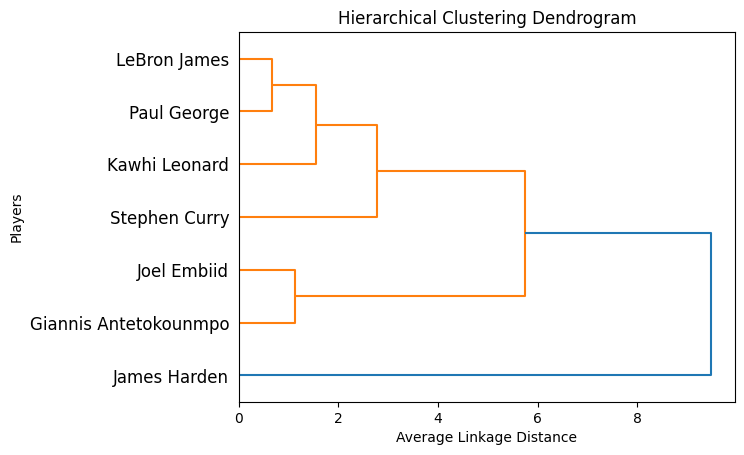

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage matrix using Average Linkage
linkage_matrix = linkage(sample_nba[['PTS', 'REB']], method='average')

# Create the dendrogram
dendrogram(linkage_matrix, labels=sample_nba['PLAYER'].tolist(), orientation='right')

# Add labels and show the plot
plt.xlabel('Average Linkage Distance')
plt.ylabel('Players')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

## **Let's see how to implement agglomerative clustering**

Bottom-up approach cotains three steps in hierarchical clustering as follows:

- **Step 1: Calcaulte the similarity matrix between all pairs of players**
- **Step 2: Find and merge the nearest pairs of players**
- **Step 3: Keep doing this until all the players end up in one big group**

In [5]:
sample_nba.shape

(7, 3)

In [6]:
# First, we assign each point to a cluster.

sample_nba['cluster'] = sample_nba.index
sample_nba.head()

,PLAYER,PTS,REB,cluster
0,James Harden,36.1,6.6,0
1,Paul George,28.0,8.2,1
2,Giannis Antetokounmpo,27.7,12.5,2
3,Joel Embiid,27.5,13.6,3
4,LeBron James,27.4,8.5,4


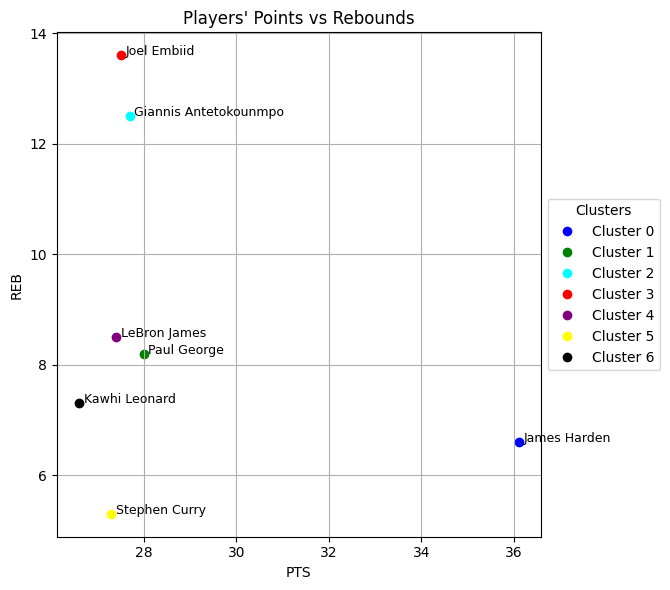

In [7]:
#@title plot

import matplotlib.pyplot as plt
import pandas as pd

# Cluster colors (dynamically adjusted based on the number of clusters)
cluster_colors = ['blue', 'green', 'cyan', 'red', 'purple', 'yellow', 'black', 'orange', 'pink', 'gray']

# Ensure the number of colors is sufficient for the number of clusters
num_clusters = sample_nba['cluster'].nunique()
if num_clusters > len(cluster_colors):
    raise ValueError("Not enough colors for the number of clusters. Please add more colors to 'cluster_colors'.")

# Assign each cluster a color
cluster_labels = [f'Cluster {i}' for i in range(num_clusters)]

# Create figure and axis with additional space for legend
plt.figure(figsize=(8,6))

# Plot each point with corresponding color based on the cluster
for i in range(len(sample_nba)):
    cluster_id = sample_nba['cluster'][i]
    plt.scatter(sample_nba['PTS'][i], sample_nba['REB'][i], color=cluster_colors[cluster_id], label=sample_nba['PLAYER'][i])
    plt.text(sample_nba['PTS'][i] + 0.1, sample_nba['REB'][i], sample_nba['PLAYER'][i], fontsize=9)

# Title and labels
plt.title("Players' Points vs Rebounds")
plt.xlabel("PTS")
plt.ylabel("REB")

# Create a legend to show the cluster colors outside the plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i], markersize=8) for i in range(num_clusters)]
plt.legend(handles, cluster_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Clusters')

# Display the plot
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to fit the legend
plt.show()

## **1.1 Step 1. Calcaulte the similarity matrix between all pairs of players**

We would like to focus on only two variables in this example: 'PTS' and 'REB', which means that the analysis will specifically address scoring and rebounding performance of players.

In [8]:
from sklearn.metrics.pairwise import cosine_distances

distance_matrix = cosine_distances(sample_nba[['PTS', 'REB']])
distance_matrix.shape

(7, 7)

In [9]:
distance_matrix

array([[0.00000000e+00, 5.40961807e-03, 2.93977426e-02, 3.85162830e-02,
        7.18861594e-03, 5.96824068e-05, 3.78328464e-03],
       [5.40961807e-03, 0.00000000e+00, 9.64679693e-03, 1.51663207e-02,
        1.26633560e-04, 4.33411878e-03, 1.45331153e-04],
       [2.93977426e-02, 9.64679693e-03, 0.00000000e+00, 6.25462814e-04,
        7.56708851e-03, 2.68260797e-02, 1.21530270e-02],
       [3.85162830e-02, 1.51663207e-02, 6.25462814e-04, 0.00000000e+00,
        1.25299610e-02, 3.55707296e-02, 1.82673291e-02],
       [7.18861594e-03, 1.26633560e-04, 7.56708851e-03, 1.25299610e-02,
        0.00000000e+00, 5.94023165e-03, 5.43249084e-04],
       [5.96824068e-05, 4.33411878e-03, 2.68260797e-02, 3.55707296e-02,
        5.94023165e-03, 0.00000000e+00, 2.89329577e-03],
       [3.78328464e-03, 1.45331153e-04, 1.21530270e-02, 1.82673291e-02,
        5.43249084e-04, 2.89329577e-03, 0.00000000e+00]])

In [10]:
np.fill_diagonal(distance_matrix, 1)

In [11]:
distance_df = pd.DataFrame(distance_matrix, index=sample_nba['PLAYER'], columns=sample_nba['PLAYER'])
distance_df

PLAYER,James Harden,Paul George,Giannis Antetokounmpo,Joel Embiid,LeBron James,Stephen Curry,Kawhi Leonard
PLAYER,,,,,,,
James Harden,1.000000,0.005410,0.029398,0.038516,0.007189,0.000060,0.003783
Paul George,0.005410,1.000000,0.009647,0.015166,0.000127,0.004334,0.000145
Giannis Antetokounmpo,0.029398,0.009647,1.000000,0.000625,0.007567,0.026826,0.012153
Joel Embiid,0.038516,0.015166,0.000625,1.000000,0.012530,0.035571,0.018267
LeBron James,0.007189,0.000127,0.007567,0.012530,1.000000,0.005940,0.000543
Stephen Curry,0.000060,0.004334,0.026826,0.035571,0.005940,1.000000,0.002893
Kawhi Leonard,0.003783,0.000145,0.012153,0.018267,0.000543,0.002893,1.000000


In [12]:
distance_df = pd.DataFrame(distance_matrix, index=sample_nba.index, columns=sample_nba.index)
distance_df

,0,1,2,3,4,5,6
0,1.000000,0.005410,0.029398,0.038516,0.007189,0.000060,0.003783
1,0.005410,1.000000,0.009647,0.015166,0.000127,0.004334,0.000145
2,0.029398,0.009647,1.000000,0.000625,0.007567,0.026826,0.012153
3,0.038516,0.015166,0.000625,1.000000,0.012530,0.035571,0.018267
4,0.007189,0.000127,0.007567,0.012530,1.000000,0.005940,0.000543
5,0.000060,0.004334,0.026826,0.035571,0.005940,1.000000,0.002893
6,0.003783,0.000145,0.012153,0.018267,0.000543,0.002893,1.000000


## **1.2 Step 2. Find and merge the nearest pairs of players**

In [13]:
# Step 2. Find and merge the nearest pairs of players
player1_inter1, player2_inter1 = distance_df.stack().idxmin()
player1_inter1, player2_inter1

(0, 5)

In [14]:
player1_inter1

0

In [15]:
sample_nba.loc[sample_nba.index.isin([player1_inter1, player2_inter1]), 'cluster'].values.min()

0

In [16]:
sample_nba.loc[sample_nba.index.isin([player1_inter1, player2_inter1]), ['PTS', 'REB']].mean().values

array([31.7 ,  5.95])

In [17]:
sample_nba_iter1 = sample_nba.copy()
sample_nba_iter1

,PLAYER,PTS,REB,cluster
0,James Harden,36.1,6.6,0
1,Paul George,28.0,8.2,1
2,Giannis Antetokounmpo,27.7,12.5,2
3,Joel Embiid,27.5,13.6,3
4,LeBron James,27.4,8.5,4
5,Stephen Curry,27.3,5.3,5
6,Kawhi Leonard,26.6,7.3,6


In [18]:
sample_nba_iter1['index'] = sample_nba_iter1.index
sample_nba_iter1.loc[sample_nba_iter1.index.isin([player1_inter1, player2_inter1]), 'cluster'] = sample_nba_iter1.loc[sample_nba_iter1.index.isin([player1_inter1, player2_inter1]), 'cluster'].values.min()
sample_nba_iter1.loc[sample_nba_iter1.index.isin([player1_inter1, player2_inter1]), ['PTS', 'REB']] = sample_nba_iter1.loc[sample_nba_iter1.index.isin([player1_inter1, player2_inter1]), ['PTS', 'REB']].mean().values
sample_nba_iter1.loc[sample_nba_iter1.index.isin([player1_inter1, player2_inter1]), ['index']] = f"{player1_inter1}_{player2_inter1}"
sample_nba_iter1.set_index('index', inplace=True)

<ipython-input-18-f188c4b01334>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0_5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample_nba_iter1.loc[sample_nba_iter1.index.isin([player1_inter1, player2_inter1]), ['index']] = f"{player1_inter1}_{player2_inter1}"


In [19]:
sample_nba_iter1

,PLAYER,PTS,REB,cluster
index,,,,
0_5,James Harden,31.7,5.95,0
1,Paul George,28.0,8.20,1
2,Giannis Antetokounmpo,27.7,12.50,2
3,Joel Embiid,27.5,13.60,3
4,LeBron James,27.4,8.50,4
0_5,Stephen Curry,31.7,5.95,0
6,Kawhi Leonard,26.6,7.30,6


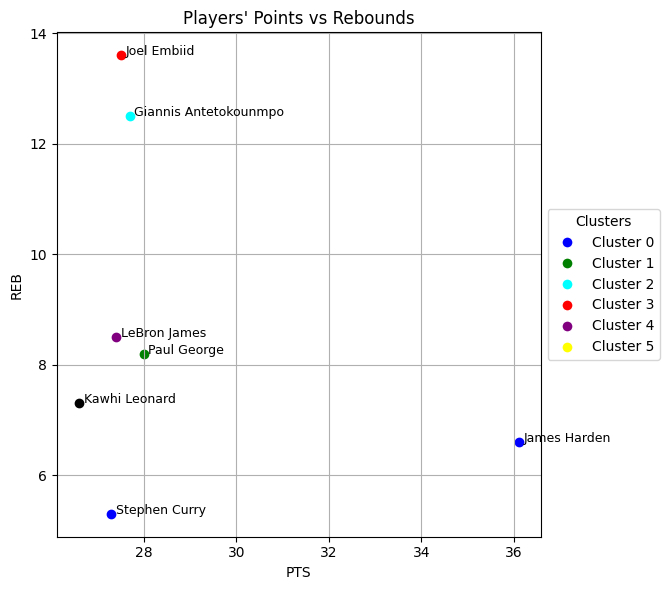

In [20]:
#@title plot

import matplotlib.pyplot as plt
import pandas as pd

# Cluster colors (dynamically adjusted based on the number of clusters)
cluster_colors = ['blue', 'green', 'cyan', 'red', 'purple', 'yellow', 'black', 'orange', 'pink', 'gray']

sample_nba['cluster'] = sample_nba_iter1.reset_index()['cluster']

# Ensure the number of colors is sufficient for the number of clusters
num_clusters = sample_nba['cluster'].nunique()
if num_clusters > len(cluster_colors):
    raise ValueError("Not enough colors for the number of clusters. Please add more colors to 'cluster_colors'.")

# Assign each cluster a color
cluster_labels = [f'Cluster {i}' for i in range(num_clusters)]

# Create figure and axis with additional space for legend
plt.figure(figsize=(8,6))

# Plot each point with corresponding color based on the cluster
for i in range(len(sample_nba)):
    cluster_id = sample_nba['cluster'][i]
    plt.scatter(sample_nba['PTS'][i], sample_nba['REB'][i], color=cluster_colors[cluster_id], label=sample_nba['PLAYER'][i])
    plt.text(sample_nba['PTS'][i] + 0.1, sample_nba['REB'][i], sample_nba['PLAYER'][i], fontsize=9)

# Title and labels
plt.title("Players' Points vs Rebounds")
plt.xlabel("PTS")
plt.ylabel("REB")

# Create a legend to show the cluster colors outside the plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i], markersize=8) for i in range(num_clusters)]
plt.legend(handles, cluster_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Clusters')

# Display the plot
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to fit the legend
plt.show()

## **1.3 Step 3. Keep doing this until all the players end up in one big group**



In [21]:
# Step 1. Calcaulte the similarity matrix between all pairs of players
sample_nba_iter1_clustering = sample_nba_iter1[~sample_nba_iter1.index.duplicated()]
distance_matrix_inter2 = cosine_distances(sample_nba_iter1_clustering[['PTS', 'REB']])
np.fill_diagonal(distance_matrix_inter2, 1)
distance_df_inter2 = pd.DataFrame(distance_matrix_inter2, index=sample_nba_iter1_clustering.index, columns=sample_nba_iter1_clustering.index)

# Step 2. Find and merge the nearest pairs of players
player1_inter2, player2_inter2 = distance_df_inter2.stack().idxmin()
sample_nba_iter2 = sample_nba_iter1.copy()
sample_nba_iter2['index'] = sample_nba_iter2.index
sample_nba_iter2.loc[sample_nba_iter2.index.isin([player1_inter2, player2_inter2]), 'cluster'] = sample_nba_iter2.loc[sample_nba_iter2.index.isin([player1_inter2, player2_inter2]), 'cluster'].values.min()
sample_nba_iter2.loc[sample_nba_iter2.index.isin([player1_inter2, player2_inter2]), ['PTS', 'REB']] = sample_nba_iter2.loc[sample_nba_iter2.index.isin([player1_inter2, player2_inter2]), ['PTS', 'REB']].mean().values
sample_nba_iter2.loc[sample_nba_iter2.index.isin([player1_inter2, player2_inter2]), ['index']] = f"{player1_inter2}_{player2_inter2}"
sample_nba_iter2.set_index('index', inplace=True)

# Step 3: Keep doing this until all the players end up in one big group
sample_nba_iter2

,PLAYER,PTS,REB,cluster
index,,,,
0_5,James Harden,31.7,5.95,0
1_4,Paul George,27.7,8.35,1
2,Giannis Antetokounmpo,27.7,12.50,2
3,Joel Embiid,27.5,13.60,3
1_4,LeBron James,27.7,8.35,1
0_5,Stephen Curry,31.7,5.95,0
6,Kawhi Leonard,26.6,7.30,6


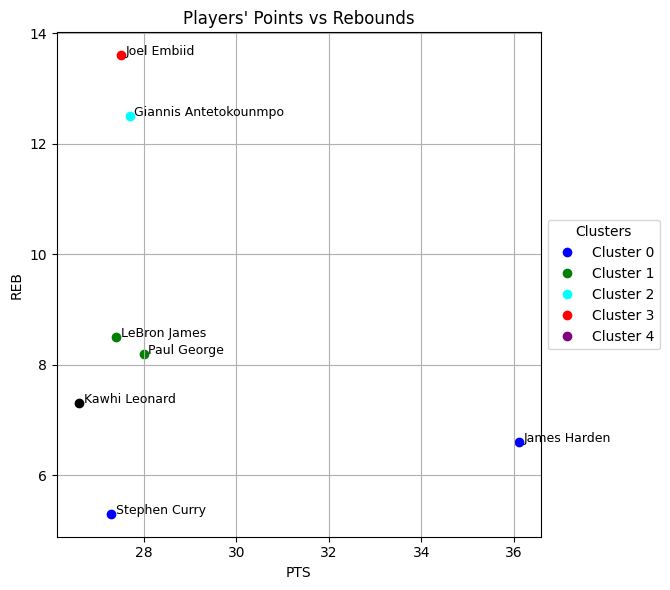

In [22]:
#@title plot

import matplotlib.pyplot as plt
import pandas as pd

# Cluster colors (dynamically adjusted based on the number of clusters)
cluster_colors = ['blue', 'green', 'cyan', 'red', 'purple', 'yellow', 'black', 'orange', 'pink', 'gray']

sample_nba['cluster'] = sample_nba_iter2.reset_index()['cluster']

# Ensure the number of colors is sufficient for the number of clusters
num_clusters = sample_nba['cluster'].nunique()
if num_clusters > len(cluster_colors):
    raise ValueError("Not enough colors for the number of clusters. Please add more colors to 'cluster_colors'.")

# Assign each cluster a color
cluster_labels = [f'Cluster {i}' for i in range(num_clusters)]

# Create figure and axis with additional space for legend
plt.figure(figsize=(8,6))

# Plot each point with corresponding color based on the cluster
for i in range(len(sample_nba)):
    cluster_id = sample_nba['cluster'][i]
    plt.scatter(sample_nba['PTS'][i], sample_nba['REB'][i], color=cluster_colors[cluster_id], label=sample_nba['PLAYER'][i])
    plt.text(sample_nba['PTS'][i] + 0.1, sample_nba['REB'][i], sample_nba['PLAYER'][i], fontsize=9)

# Title and labels
plt.title("Players' Points vs Rebounds")
plt.xlabel("PTS")
plt.ylabel("REB")

# Create a legend to show the cluster colors outside the plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i], markersize=8) for i in range(num_clusters)]
plt.legend(handles, cluster_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Clusters')

# Display the plot
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to fit the legend
plt.show()

## **Exercise 1: Perform the Next Iteration and Plot the Results**

In [23]:
# Step 1. Calcaulte the similarity matrix between all pairs of players
sample_nba_iter2_clustering = sample_nba_iter2[~sample_nba_iter2.index.duplicated()]
distance_matrix_inter3 = cosine_distances(sample_nba_iter2_clustering[['PTS', 'REB']])
np.fill_diagonal(distance_matrix_inter3, 1)
distance_df_inter3 = pd.DataFrame(distance_matrix_inter3, index=sample_nba_iter2_clustering.index, columns=sample_nba_iter2_clustering.index)

# Step 2. Find and merge the nearest pairs of players
player1_inter3, player2_inter3 = distance_df_inter3.stack().idxmin()
sample_nba_iter3 = sample_nba_iter2.copy()
sample_nba_iter3['index'] = sample_nba_iter2.index
sample_nba_iter3.loc[sample_nba_iter3.index.isin([player1_inter3, player2_inter3]), 'cluster'] = sample_nba_iter3.loc[sample_nba_iter2.index.isin([player1_inter3, player2_inter3]), 'cluster'].values.min()
sample_nba_iter3.loc[sample_nba_iter3.index.isin([player1_inter3, player2_inter3]), ['PTS', 'REB']] = sample_nba_iter3.loc[sample_nba_iter2.index.isin([player1_inter3, player2_inter3]), ['PTS', 'REB']].mean().values
sample_nba_iter3.loc[sample_nba_iter3.index.isin([player1_inter3, player2_inter3]), ['index']] = f"{player1_inter3}_{player2_inter3}"
sample_nba_iter3.set_index('index', inplace=True)

# Step 3: Keep doing this until all the players end up in one big group
sample_nba_iter3

,PLAYER,PTS,REB,cluster
index,,,,
0_5,James Harden,31.700000,5.95,0
1_4_6,Paul George,27.333333,8.00,1
2,Giannis Antetokounmpo,27.700000,12.50,2
3,Joel Embiid,27.500000,13.60,3
1_4_6,LeBron James,27.333333,8.00,1
0_5,Stephen Curry,31.700000,5.95,0
1_4_6,Kawhi Leonard,27.333333,8.00,1


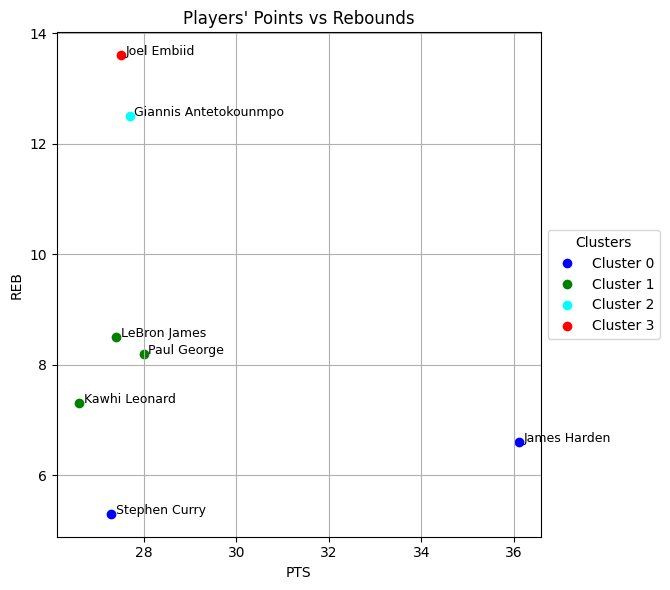

In [24]:
#@title plot

import matplotlib.pyplot as plt
import pandas as pd

# Cluster colors (dynamically adjusted based on the number of clusters)
cluster_colors = ['blue', 'green', 'cyan', 'red', 'purple', 'yellow', 'black', 'orange', 'pink', 'gray']

sample_nba['cluster'] = sample_nba_iter3.reset_index()['cluster']

# Ensure the number of colors is sufficient for the number of clusters
num_clusters = sample_nba['cluster'].nunique()
if num_clusters > len(cluster_colors):
    raise ValueError("Not enough colors for the number of clusters. Please add more colors to 'cluster_colors'.")

# Assign each cluster a color
cluster_labels = [f'Cluster {i}' for i in range(num_clusters)]

# Create figure and axis with additional space for legend
plt.figure(figsize=(8,6))

# Plot each point with corresponding color based on the cluster
for i in range(len(sample_nba)):
    cluster_id = sample_nba['cluster'][i]
    plt.scatter(sample_nba['PTS'][i], sample_nba['REB'][i], color=cluster_colors[cluster_id], label=sample_nba['PLAYER'][i])
    plt.text(sample_nba['PTS'][i] + 0.1, sample_nba['REB'][i], sample_nba['PLAYER'][i], fontsize=9)

# Title and labels
plt.title("Players' Points vs Rebounds")
plt.xlabel("PTS")
plt.ylabel("REB")

# Create a legend to show the cluster colors outside the plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i], markersize=8) for i in range(num_clusters)]
plt.legend(handles, cluster_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Clusters')

# Display the plot
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to fit the legend
plt.show()

## **Exercise 2: Continue this process until all players are in one cluster**

In [25]:
# Step 1. Calcaulte the similarity matrix between all pairs of players
sample_nba_iter3_clustering = sample_nba_iter3[~sample_nba_iter3.index.duplicated()]
distance_matrix_inter4 = cosine_distances(sample_nba_iter3_clustering[['PTS', 'REB']])
np.fill_diagonal(distance_matrix_inter4, 1)
distance_df_inter4 = pd.DataFrame(distance_matrix_inter4, index=sample_nba_iter3_clustering.index, columns=sample_nba_iter3_clustering.index)

# Step 2. Find and merge the nearest pairs of players
player1_inter4, player2_inter4 = distance_df_inter4.stack().idxmin()
sample_nba_iter4 = sample_nba_iter3.copy()
sample_nba_iter4['index'] = sample_nba_iter3.index
sample_nba_iter4.loc[sample_nba_iter4.index.isin([player1_inter4, player2_inter4]), 'cluster'] = sample_nba_iter4.loc[sample_nba_iter4.index.isin([player1_inter4, player2_inter4]), 'cluster'].values.min()
sample_nba_iter4.loc[sample_nba_iter4.index.isin([player1_inter4, player2_inter4]), ['PTS', 'REB']] = sample_nba_iter4.loc[sample_nba_iter4.index.isin([player1_inter4, player2_inter4]), ['PTS', 'REB']].mean().values
sample_nba_iter4.loc[sample_nba_iter4.index.isin([player1_inter4, player2_inter4]), ['index']] = f"{player1_inter4}_{player2_inter4}"
sample_nba_iter4.set_index('index', inplace=True)

# Step 3: Keep doing this until all the players end up in one big group
sample_nba_iter4

,PLAYER,PTS,REB,cluster
index,,,,
0_5,James Harden,31.700000,5.95,0
1_4_6,Paul George,27.333333,8.00,1
2_3,Giannis Antetokounmpo,27.600000,13.05,2
2_3,Joel Embiid,27.600000,13.05,2
1_4_6,LeBron James,27.333333,8.00,1
0_5,Stephen Curry,31.700000,5.95,0
1_4_6,Kawhi Leonard,27.333333,8.00,1


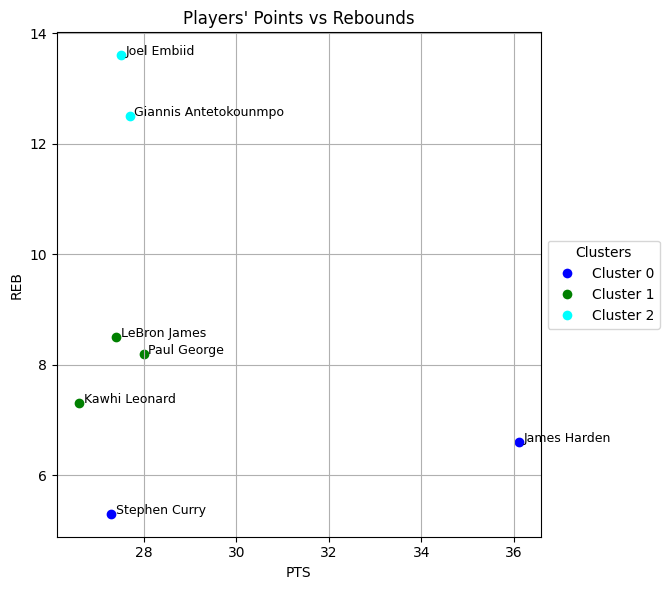

In [26]:
#@title plot

import matplotlib.pyplot as plt
import pandas as pd

# Cluster colors (dynamically adjusted based on the number of clusters)
cluster_colors = ['blue', 'green', 'cyan', 'red', 'purple', 'yellow', 'black', 'orange', 'pink', 'gray']

sample_nba['cluster'] = sample_nba_iter4.reset_index()['cluster']

# Ensure the number of colors is sufficient for the number of clusters
num_clusters = sample_nba['cluster'].nunique()
if num_clusters > len(cluster_colors):
    raise ValueError("Not enough colors for the number of clusters. Please add more colors to 'cluster_colors'.")

# Assign each cluster a color
cluster_labels = [f'Cluster {i}' for i in range(num_clusters)]

# Create figure and axis with additional space for legend
plt.figure(figsize=(8,6))

# Plot each point with corresponding color based on the cluster
for i in range(len(sample_nba)):
    cluster_id = sample_nba['cluster'][i]
    plt.scatter(sample_nba['PTS'][i], sample_nba['REB'][i], color=cluster_colors[cluster_id], label=sample_nba['PLAYER'][i])
    plt.text(sample_nba['PTS'][i] + 0.1, sample_nba['REB'][i], sample_nba['PLAYER'][i], fontsize=9)

# Title and labels
plt.title("Players' Points vs Rebounds")
plt.xlabel("PTS")
plt.ylabel("REB")

# Create a legend to show the cluster colors outside the plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i], markersize=8) for i in range(num_clusters)]
plt.legend(handles, cluster_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Clusters')

# Display the plot
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to fit the legend
plt.show()

In [27]:
# Step 1. Calcaulte the similarity matrix between all pairs of players
sample_nba_iter4_clustering = sample_nba_iter4[~sample_nba_iter4.index.duplicated()]
distance_matrix_inter5 = cosine_distances(sample_nba_iter4_clustering[['PTS', 'REB']])
np.fill_diagonal(distance_matrix_inter5, 1)
distance_df_inter5 = pd.DataFrame(distance_matrix_inter5, index=sample_nba_iter4_clustering.index, columns=sample_nba_iter4_clustering.index)

# Step 2. Find and merge the nearest pairs of players
player1_inter5, player2_inter5 = distance_df_inter5.stack().idxmin()
sample_nba_iter5 = sample_nba_iter4.copy()
sample_nba_iter5['index'] = sample_nba_iter4.index
sample_nba_iter5.loc[sample_nba_iter5.index.isin([player1_inter5, player2_inter5]), 'cluster'] = sample_nba_iter5.loc[sample_nba_iter5.index.isin([player1_inter5, player2_inter5]), 'cluster'].values.min()
sample_nba_iter5.loc[sample_nba_iter5.index.isin([player1_inter5, player2_inter5]), ['PTS', 'REB']] = sample_nba_iter5.loc[sample_nba_iter5.index.isin([player1_inter5, player2_inter5]), ['PTS', 'REB']].mean().values
sample_nba_iter5.loc[sample_nba_iter5.index.isin([player1_inter5, player2_inter5]), ['index']] = f"{player1_inter5}_{player2_inter5}"
sample_nba_iter5.set_index('index', inplace=True)

# Step 3: Keep doing this until all the players end up in one big group
sample_nba_iter5

,PLAYER,PTS,REB,cluster
index,,,,
0_5_1_4_6,James Harden,29.08,7.18,0
0_5_1_4_6,Paul George,29.08,7.18,0
2_3,Giannis Antetokounmpo,27.60,13.05,2
2_3,Joel Embiid,27.60,13.05,2
0_5_1_4_6,LeBron James,29.08,7.18,0
0_5_1_4_6,Stephen Curry,29.08,7.18,0
0_5_1_4_6,Kawhi Leonard,29.08,7.18,0


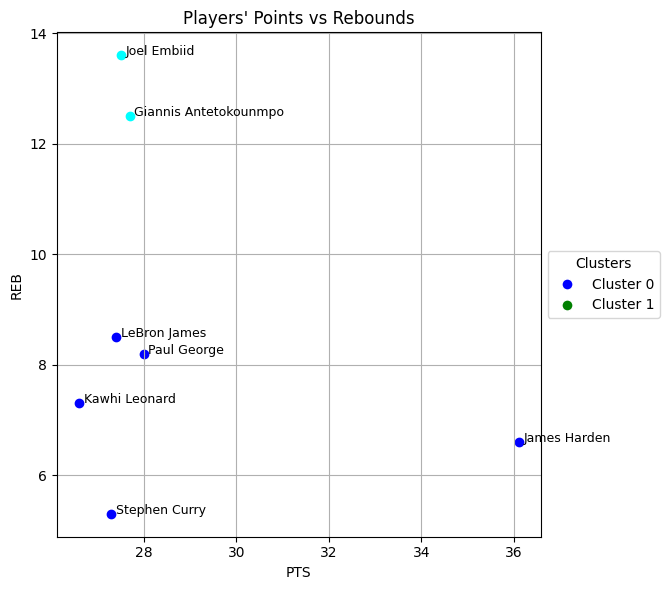

In [28]:
#@title plot

import matplotlib.pyplot as plt
import pandas as pd

# Cluster colors (dynamically adjusted based on the number of clusters)
cluster_colors = ['blue', 'green', 'cyan', 'red', 'purple', 'yellow', 'black', 'orange', 'pink', 'gray']

sample_nba['cluster'] = sample_nba_iter5.reset_index()['cluster']

# Ensure the number of colors is sufficient for the number of clusters
num_clusters = sample_nba['cluster'].nunique()
if num_clusters > len(cluster_colors):
    raise ValueError("Not enough colors for the number of clusters. Please add more colors to 'cluster_colors'.")

# Assign each cluster a color
cluster_labels = [f'Cluster {i}' for i in range(num_clusters)]

# Create figure and axis with additional space for legend
plt.figure(figsize=(8,6))

# Plot each point with corresponding color based on the cluster
for i in range(len(sample_nba)):
    cluster_id = sample_nba['cluster'][i]
    plt.scatter(sample_nba['PTS'][i], sample_nba['REB'][i], color=cluster_colors[cluster_id], label=sample_nba['PLAYER'][i])
    plt.text(sample_nba['PTS'][i] + 0.1, sample_nba['REB'][i], sample_nba['PLAYER'][i], fontsize=9)

# Title and labels
plt.title("Players' Points vs Rebounds")
plt.xlabel("PTS")
plt.ylabel("REB")

# Create a legend to show the cluster colors outside the plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i], markersize=8) for i in range(num_clusters)]
plt.legend(handles, cluster_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Clusters')

# Display the plot
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to fit the legend
plt.show()

In [29]:
# Step 1. Calcaulte the similarity matrix between all pairs of players
sample_nba_iter5_clustering = sample_nba_iter5[~sample_nba_iter5.index.duplicated()]
distance_matrix_inter6 = cosine_distances(sample_nba_iter5_clustering[['PTS', 'REB']])
np.fill_diagonal(distance_matrix_inter6, 1)
distance_df_inter6 = pd.DataFrame(distance_matrix_inter6, index=sample_nba_iter5_clustering.index, columns=sample_nba_iter5_clustering.index)

# Step 2. Find and merge the nearest pairs of players
player1_inter6, player2_inter6 = distance_df_inter6.stack().idxmin()
sample_nba_iter6 = sample_nba_iter5.copy()
sample_nba_iter6['index'] = sample_nba_iter5.index
sample_nba_iter6.loc[sample_nba_iter6.index.isin([player1_inter6, player2_inter6]), 'cluster'] = sample_nba_iter6.loc[sample_nba_iter6.index.isin([player1_inter6, player2_inter6]), 'cluster'].values.min()
sample_nba_iter6.loc[sample_nba_iter6.index.isin([player1_inter6, player2_inter6]), ['PTS', 'REB']] = sample_nba_iter6.loc[sample_nba_iter6.index.isin([player1_inter6, player2_inter6]), ['PTS', 'REB']].mean().values
sample_nba_iter6.loc[sample_nba_iter6.index.isin([player1_inter6, player2_inter6]), ['index']] = f"{player1_inter6}_{player2_inter6}"
sample_nba_iter6.set_index('index', inplace=True)

# Step 3: Keep doing this until all the players end up in one big group
sample_nba_iter6

,PLAYER,PTS,REB,cluster
index,,,,
0_5_1_4_6_2_3,James Harden,28.657143,8.857143,0
0_5_1_4_6_2_3,Paul George,28.657143,8.857143,0
0_5_1_4_6_2_3,Giannis Antetokounmpo,28.657143,8.857143,0
0_5_1_4_6_2_3,Joel Embiid,28.657143,8.857143,0
0_5_1_4_6_2_3,LeBron James,28.657143,8.857143,0
0_5_1_4_6_2_3,Stephen Curry,28.657143,8.857143,0
0_5_1_4_6_2_3,Kawhi Leonard,28.657143,8.857143,0


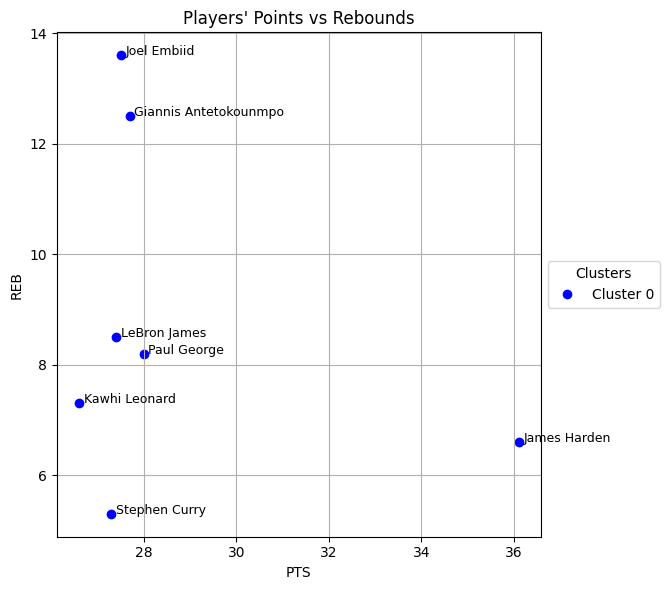

In [30]:
#@title plot

import matplotlib.pyplot as plt
import pandas as pd

# Cluster colors (dynamically adjusted based on the number of clusters)
cluster_colors = ['blue', 'green', 'cyan', 'red', 'purple', 'yellow', 'black', 'orange', 'pink', 'gray']

sample_nba['cluster'] = sample_nba_iter6.reset_index()['cluster']

# Ensure the number of colors is sufficient for the number of clusters
num_clusters = sample_nba['cluster'].nunique()
if num_clusters > len(cluster_colors):
    raise ValueError("Not enough colors for the number of clusters. Please add more colors to 'cluster_colors'.")

# Assign each cluster a color
cluster_labels = [f'Cluster {i}' for i in range(num_clusters)]

# Create figure and axis with additional space for legend
plt.figure(figsize=(8,6))

# Plot each point with corresponding color based on the cluster
for i in range(len(sample_nba)):
    cluster_id = sample_nba['cluster'][i]
    plt.scatter(sample_nba['PTS'][i], sample_nba['REB'][i], color=cluster_colors[cluster_id], label=sample_nba['PLAYER'][i])
    plt.text(sample_nba['PTS'][i] + 0.1, sample_nba['REB'][i], sample_nba['PLAYER'][i], fontsize=9)

# Title and labels
plt.title("Players' Points vs Rebounds")
plt.xlabel("PTS")
plt.ylabel("REB")

# Create a legend to show the cluster colors outside the plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i], markersize=8) for i in range(num_clusters)]
plt.legend(handles, cluster_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Clusters')

# Display the plot
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to fit the legend
plt.show()

In [37]:
sample_nba['cluster'] = sample_nba.index
sample_nba.head()
sample_nba_iter = sample_nba.copy()
cluster_iter_all = []

for i in range(10):
  # Step 1. Calcaulte the similarity matrix between all pairs of players
  sample_nba_iter_clustering = sample_nba_iter[~sample_nba_iter.index.duplicated()]
  distance_matrix_inter = cosine_distances(sample_nba_iter_clustering[['PTS', 'REB']])
  np.fill_diagonal(distance_matrix_inter, 1)
  distance_df_inter = pd.DataFrame(distance_matrix_inter, index=sample_nba_iter_clustering.index, columns=sample_nba_iter_clustering.index)

  # Step 2. Find and merge the nearest pairs of players
  player1_inter, player2_inter = distance_df_inter.stack().idxmin()
  sample_nba_iter['index'] = sample_nba_iter.index
  sample_nba_iter.loc[sample_nba_iter.index.isin([player1_inter, player2_inter]), 'cluster'] = sample_nba_iter.loc[sample_nba_iter.index.isin([player1_inter, player2_inter]), 'cluster'].values.min()
  cluster_iter_all.append(sample_nba_iter.cluster.to_list())

  sample_nba_iter.loc[sample_nba_iter.index.isin([player1_inter, player2_inter]), ['PTS', 'REB']] = sample_nba_iter.loc[sample_nba_iter.index.isin([player1_inter, player2_inter]), ['PTS', 'REB']].mean().values
  sample_nba_iter.loc[sample_nba_iter.index.isin([player1_inter, player2_inter]), ['index']] = f"{player1_inter}_{player2_inter}"
  sample_nba_iter.set_index('index', inplace=True)

  # Step 3: Keep doing this until all the players end up in one big group
  sample_nba_iter

<ipython-input-37-2e5e5e6264a7>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0_5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample_nba_iter.loc[sample_nba_iter.index.isin([player1_inter, player2_inter]), ['index']] = f"{player1_inter}_{player2_inter}"


In [34]:
cluster_iter_all

[[0, 1, 2, 3, 4, 0, 6],
 [0, 1, 2, 3, 1, 0, 6],
 [0, 1, 2, 3, 1, 0, 1],
 [0, 1, 2, 2, 1, 0, 1],
 [0, 0, 2, 2, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

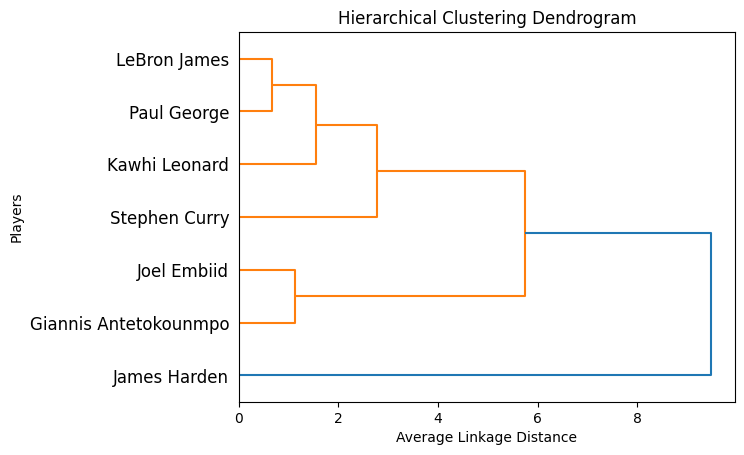

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage matrix using Average Linkage
linkage_matrix = linkage(sample_nba[['PTS', 'REB']], method='average')

# Create the dendrogram
dendrogram(linkage_matrix, labels=sample_nba['PLAYER'].tolist(), orientation='right')

# Add labels and show the plot
plt.xlabel('Average Linkage Distance')
plt.ylabel('Players')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# KMeans Clustering


The k-means clustering algorithm can be summarized in three main steps:

- **Step 1: Initialization - Randomly initialize k centroids**
- **Step 2: Assignment - Assign each point to the nearest centroid**
- **Step 3: Update Centroids - Recalculate centroids**

Repeat Steps 2 and 3 until the centroids no longer change significantly, at which point the algorithm has converged, and the final clusters have been found.

![](https://github.com/aaubs/ds-master/raw/main/data/Images/kmeans_clustering.bin)

## KMeans Using sklearn

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = sample_nba[['PTS', 'REB']].values  # Points (PTS) and Rebounds (REB)
player_names = sample_nba['PLAYER'].values  # Player names

k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
y_kmeans

array([2, 1, 0, 0, 1, 3, 1], dtype=int32)

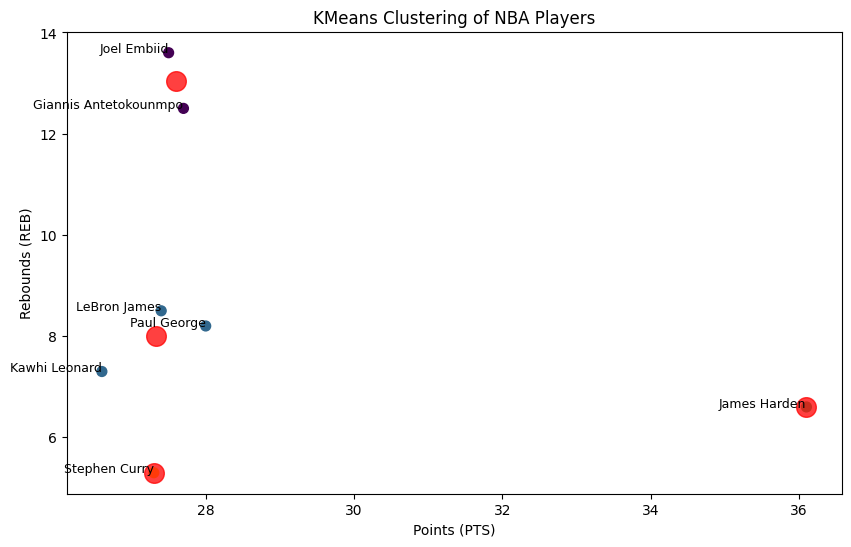

In [41]:
#@title plot

# Step 3: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)

# Annotate each player on the scatter plot
for i, player in enumerate(player_names):
    plt.text(X[i, 0], X[i, 1], player, fontsize=9, ha='right')

# Add labels and title
plt.xlabel('Points (PTS)')
plt.ylabel('Rebounds (REB)')
plt.title('KMeans Clustering of NBA Players')

plt.show()

## **How the KMeans Algorithm Works**

In [42]:
# Step 1: Initialization - Randomly initialize k centroids
k = 4
random_indices = np.random.choice(len(X), k, replace=False)
centroids_random = X[random_indices]

## Iteration 1

In [43]:
# Step 2: Assignment - Assign each point to the nearest centroid using cosine distance
distances_iter1 = cosine_distances(X, centroids_random)
labels_iter1 = np.argmin(distances_iter1, axis=1)

In [44]:
iteration_visualizations = []
# Capture current state for visualization
iteration_visualizations.append((centroids_random.copy(), labels_iter1.copy()))
iteration_visualizations

[(array([[27.7, 12.5],
         [26.6,  7.3],
         [27.5, 13.6],
         [27.3,  5.3]]),
  array([3, 1, 0, 2, 1, 3, 1]))]

In [45]:
iteration_visualizations[0]

(array([[27.7, 12.5],
        [26.6,  7.3],
        [27.5, 13.6],
        [27.3,  5.3]]),
 array([3, 1, 0, 2, 1, 3, 1]))

In [46]:
# Initialize an empty list to hold the new centroids
new_centroids = []

# Loop through each cluster label from 0 to k-1
for j in range(k):
    # Extract points belonging to cluster j
    cluster_points = X[labels_iter1 == j]

    # Calculate the mean of these points to get the new centroid
    centroid = cluster_points.mean(axis=0)

    # Append the new centroid to the list of new centroids
    new_centroids.append(centroid)

# Convert the list of centroids into a NumPy array
new_centroids = np.array(new_centroids)
new_centroids

array([[27.7       , 12.5       ],
       [27.33333333,  8.        ],
       [27.5       , 13.6       ],
       [31.7       ,  5.95      ]])

In [47]:
# @title Plot

import matplotlib.pyplot as plt

def plot_clusters(data, centroids, labels, iteration):
    point_indices = data
    """Helper function to plot data points, centroids, and indices."""
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjusting the figure size as needed.
    # Scatter plot for data points
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=30)
    # Scatter plot for centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)
    # Annotating each point with its index
    for index, point in enumerate(data):
        ax.text(point[0], point[1], str(index), color='black', fontsize=8)
    # Set title for the subplot
    ax.set_title(f"Iteration {iteration + 1}")

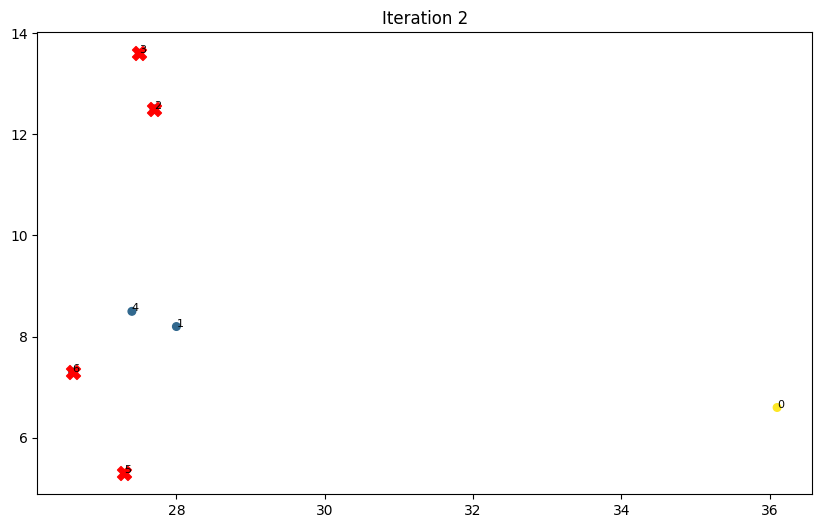

In [48]:
plot_clusters(X, centroids_random, labels_iter1, 1)

In [49]:
labels_iter1

array([3, 1, 0, 2, 1, 3, 1])

## Iteration 2

In [50]:
centroids_iter2 = new_centroids

In [51]:
# Step 2: Assignment - Assign each point to the nearest centroid using cosine distance
distances_iter2 = cosine_distances(X, centroids_iter2)
labels_iter2 = np.argmin(distances_iter2, axis=1)

In [52]:
# Capture current state for visualization
iteration_visualizations.append((centroids_iter2.copy(), labels_iter2.copy()))
iteration_visualizations

[(array([[27.7, 12.5],
         [26.6,  7.3],
         [27.5, 13.6],
         [27.3,  5.3]]),
  array([3, 1, 0, 2, 1, 3, 1])),
 (array([[27.7       , 12.5       ],
         [27.33333333,  8.        ],
         [27.5       , 13.6       ],
         [31.7       ,  5.95      ]]),
  array([3, 1, 0, 2, 1, 3, 1]))]

In [53]:
# Initialize an empty list to hold the new centroids
new_centroids = []

# Loop through each cluster label from 0 to k-1
for j in range(k):
    # Extract points belonging to cluster j
    cluster_points = X[labels_iter2 == j]

    # Calculate the mean of these points to get the new centroid
    centroid = cluster_points.mean(axis=0)

    # Append the new centroid to the list of new centroids
    new_centroids.append(centroid)

# Convert the list of centroids into a NumPy array
new_centroids = np.array(new_centroids)
new_centroids

array([[27.7       , 12.5       ],
       [27.33333333,  8.        ],
       [27.5       , 13.6       ],
       [31.7       ,  5.95      ]])

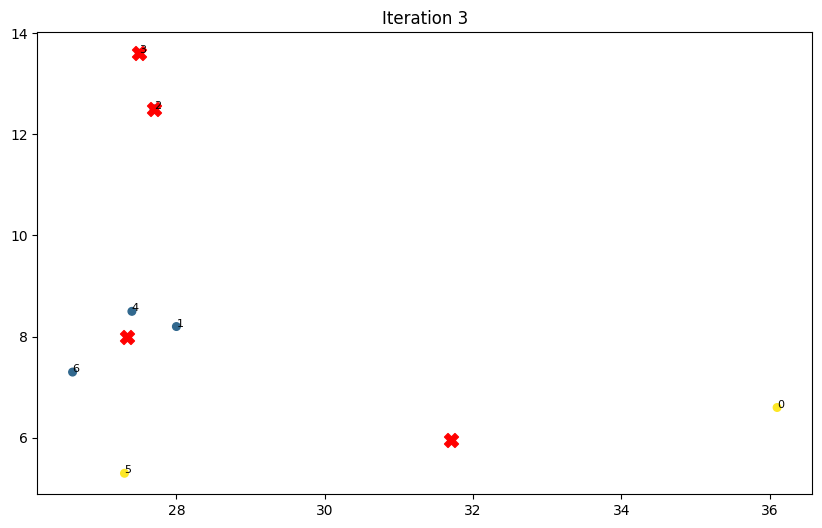

In [54]:
plot_clusters(X, centroids_iter2, labels_iter2, 2)

## **Exercise 3: Perform Subsequent Iterations and Plot the Results Until the Centroids Converge**

## Iteration 3

In [ ]:
centroids_iter3 = new_centroids

In [ ]:
# Step 2: Assignment - Assign each point to the nearest centroid using cosine distance
distances_iter3 = cosine_distances(X, centroids_iter3)
labels_iter3 = np.argmin(distances_iter3, axis=1)

In [ ]:
# Capture current state for visualization
iteration_visualizations.append((centroids_iter3.copy(), labels_iter3.copy()))
iteration_visualizations

[(array([[36.1,  6.6],
         [27.3,  5.3],
         [28. ,  8.2],
         [26.6,  7.3]]),
  array([0, 2, 2, 2, 2, 1, 3])),
 (array([[36.1 ,  6.6 ],
         [27.3 ,  5.3 ],
         [27.65, 10.7 ],
         [26.6 ,  7.3 ]]),
  array([0, 3, 2, 2, 3, 1, 3])),
 (array([[36.1       ,  6.6       ],
         [27.3       ,  5.3       ],
         [27.6       , 13.05      ],
         [27.33333333,  8.        ]]),
  array([0, 3, 2, 2, 3, 1, 3]))]

In [ ]:
# Initialize an empty list to hold the new centroids
new_centroids = []

# Loop through each cluster label from 0 to k-1
for j in range(k):
    # Extract points belonging to cluster j
    cluster_points = X[labels_iter3 == j]

    # Calculate the mean of these points to get the new centroid
    centroid = cluster_points.mean(axis=0)

    # Append the new centroid to the list of new centroids
    new_centroids.append(centroid)

# Convert the list of centroids into a NumPy array
new_centroids = np.array(new_centroids)
new_centroids

array([[36.1       ,  6.6       ],
       [27.3       ,  5.3       ],
       [27.6       , 13.05      ],
       [27.33333333,  8.        ]])

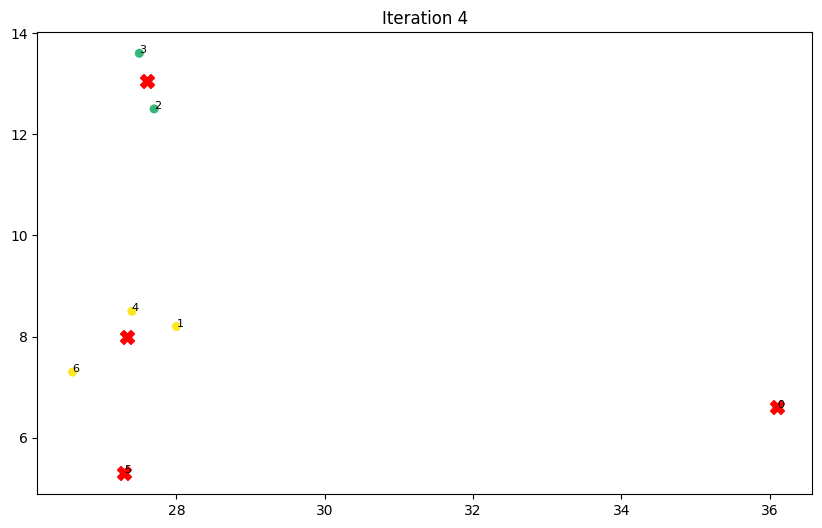

In [ ]:
plot_clusters(X, centroids_iter3, labels_iter3, 3)

## Iteration 4

In [ ]:
centroids_iter4 = new_centroids

In [ ]:
# Step 2: Assignment - Assign each point to the nearest centroid using cosine distance
distances_iter4 = cosine_distances(X, centroids_iter4)
labels_iter4 = np.argmin(distances_iter4, axis=1)

In [ ]:
# Capture current state for visualization
iteration_visualizations.append((centroids_iter4.copy(), labels_iter4.copy()))
iteration_visualizations

[(array([[36.1,  6.6],
         [27.3,  5.3],
         [28. ,  8.2],
         [26.6,  7.3]]),
  array([0, 2, 2, 2, 2, 1, 3])),
 (array([[36.1 ,  6.6 ],
         [27.3 ,  5.3 ],
         [27.65, 10.7 ],
         [26.6 ,  7.3 ]]),
  array([0, 3, 2, 2, 3, 1, 3])),
 (array([[36.1       ,  6.6       ],
         [27.3       ,  5.3       ],
         [27.6       , 13.05      ],
         [27.33333333,  8.        ]]),
  array([0, 3, 2, 2, 3, 1, 3])),
 (array([[36.1       ,  6.6       ],
         [27.3       ,  5.3       ],
         [27.6       , 13.05      ],
         [27.33333333,  8.        ]]),
  array([0, 3, 2, 2, 3, 1, 3]))]

In [ ]:
# Initialize an empty list to hold the new centroids
new_centroids = []

# Loop through each cluster label from 0 to k-1
for j in range(k):
    # Extract points belonging to cluster j
    cluster_points = X[labels_iter4 == j]

    # Calculate the mean of these points to get the new centroid
    centroid = cluster_points.mean(axis=0)

    # Append the new centroid to the list of new centroids
    new_centroids.append(centroid)

# Convert the list of centroids into a NumPy array
new_centroids = np.array(new_centroids)
new_centroids

array([[36.1       ,  6.6       ],
       [27.3       ,  5.3       ],
       [27.6       , 13.05      ],
       [27.33333333,  8.        ]])

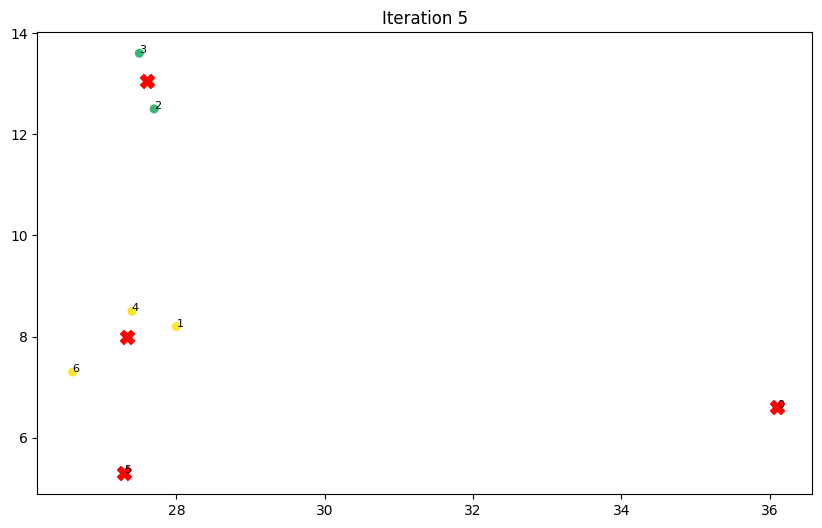

In [ ]:
plot_clusters(X, centroids_iter4, labels_iter4, 4)

In [ ]:
iteration_visualizations[0][1]

array([0, 2, 2, 2, 2, 1, 3])

In [ ]:
iteration_visualizations[1][i]

[array([27.7 ,  8.35]),
 array([31.7 ,  5.95]),
 array([27.6 , 13.05]),
 array([26.6,  7.3])]

In [ ]:
iteration_visualizations[i][0]

[array([27.6 , 13.05]),
 array([27.33333333,  8.        ]),
 array([27.3,  5.3]),
 array([36.1,  6.6])]

In [ ]:
new_centroids

[array([27.6 , 13.05]),
 array([27.33333333,  8.        ]),
 array([27.3,  5.3]),
 array([36.1,  6.6])]

In [57]:
def plot_clusters(X, centroids, labels, iteration):
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b', 'y']
    for i in range(k):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Cluster {i}')
        plt.scatter(centroids[i][0], centroids[i][1], c='black', s=200, alpha=0.5)
    plt.title(f'Clusters at iteration {iteration}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

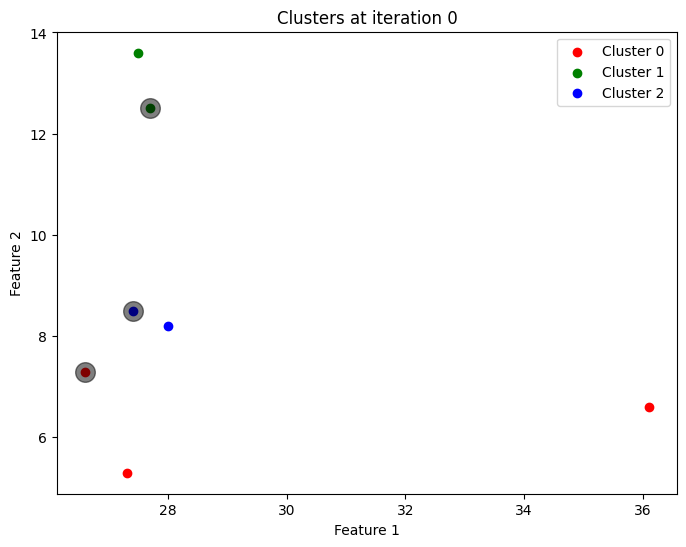

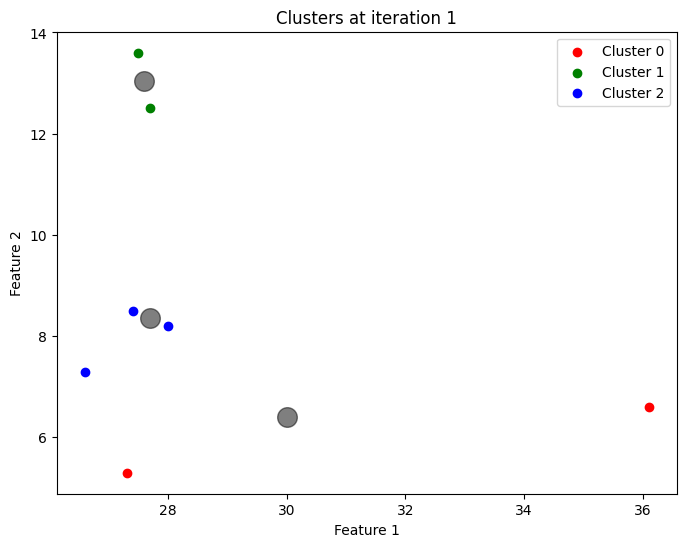

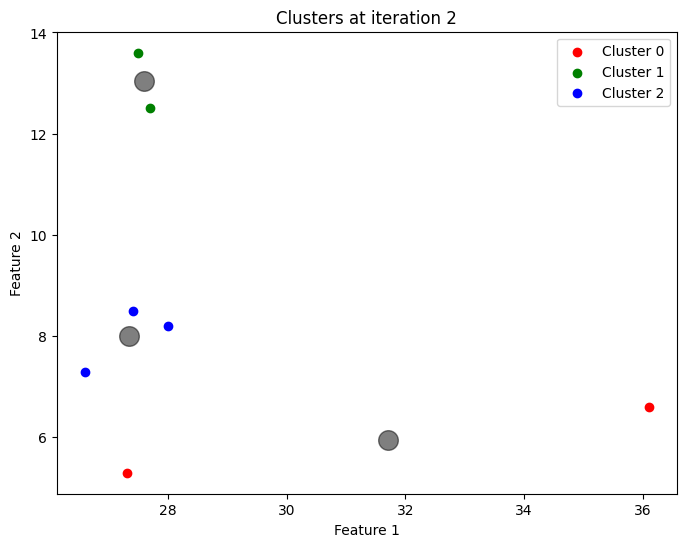

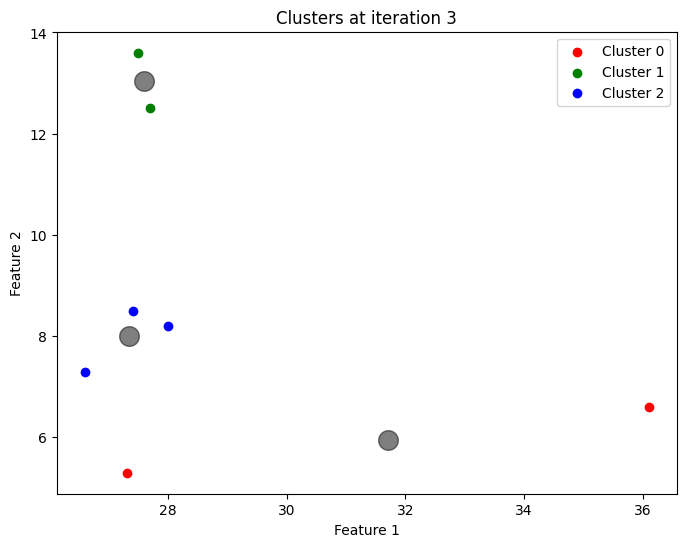

In [61]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt

# Step 1: Initialization - Randomly initialize k centroids
k = 3
random_indices = np.random.choice(len(X), k, replace=False)
centroids_random = X[random_indices]

# Step 2: Assignment - Assign each point to the nearest centroid using cosine distance
distances_iter1 = cosine_distances(X, centroids_random)
labels_iter1 = np.argmin(distances_iter1, axis=1)

# Capture current state for visualization
iteration_visualizations = []
iteration_visualizations.append((centroids_random.copy(), labels_iter1.copy()))

# Plot each iteration
plot_clusters(X, centroids_random, labels_iter1, 0)

for i in range(3):
    # Step 3: Update Centroids - Recalculate centroids
    new_centroids = []
    for j in range(k):
        cluster_points = X[labels_iter1 == j]
        centroid = cluster_points.mean(axis=0)
        new_centroids.append(centroid)

    # Step 2: Assignment - Assign each point to the nearest centroid using cosine distance
    distances_iter = cosine_distances(X, new_centroids)
    labels_iter = np.argmin(distances_iter, axis=1)
    iteration_visualizations.append((new_centroids.copy(), labels_iter.copy()))

    # Plot each iteration
    plot_clusters(X, new_centroids, labels_iter, i + 1)

    # Check for convergence (might need adjustment if using other than L2 norm)
    if np.allclose(iteration_visualizations[i][0], np.array(new_centroids)):
        break

    # Update labels for the next iteration
    labels_iter1 = labels_iter.copy()

## **Exercise 4: Perform KMeans Clustering for make_blobs dataset**

In [62]:
from sklearn.datasets import make_blobs

# Generate synthetic data for demonstration
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [64]:
y_kmeans

array([1, 1, 3, 2, 1, 2, 0, 2, 3, 0, 3, 0, 3, 3, 1, 3, 1, 0, 3, 3, 0, 3,
       2, 1, 3, 1, 1, 2, 2, 0, 3, 0, 1, 0, 1, 3, 1, 2, 1, 2, 0, 3, 1, 2,
       3, 3, 1, 0, 1, 0, 2, 1, 2, 3, 2, 0, 1, 0, 0, 3, 1, 0, 0, 3, 2, 2,
       2, 2, 2, 3, 2, 2, 1, 0, 3, 1, 2, 2, 3, 2, 3, 3, 1, 3, 2, 1, 1, 0,
       0, 0, 1, 3, 1, 3, 3, 1, 2, 3, 1, 1, 0, 0, 0, 3, 3, 3, 3, 3, 2, 1,
       0, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 2, 3, 1, 2, 1, 1, 3, 1, 2, 0, 3,
       3, 3, 3, 0, 0, 1, 3, 2, 3, 0, 2, 3, 0, 0, 0, 0, 2, 3, 3, 1, 0, 2,
       3, 0, 2, 1, 1, 0, 3, 1, 2, 1, 0, 1, 2, 3, 3, 3, 3, 3, 2, 0, 0, 2,
       2, 0, 0, 2, 1, 3, 1, 0, 0, 1, 2, 3, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0,
       0, 1, 3, 3, 2, 0, 3, 2, 2, 1, 2, 3, 3, 2, 2, 0, 1, 2, 1, 1, 3, 1,
       1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 3, 2, 0, 2, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 3, 1, 3, 0, 3, 1, 3,
       2, 0, 2, 0, 0, 3, 3, 2, 0, 0, 1, 1, 2, 3, 3, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 2, 3, 2, 0, 3, 1, 3, 0, 3, 1, 1], d

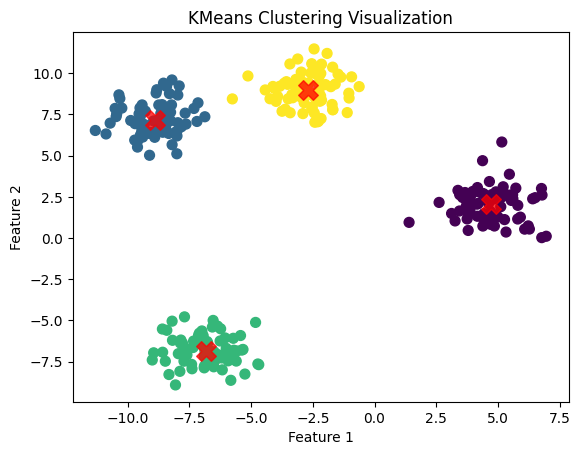

In [65]:
# Plot the Results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

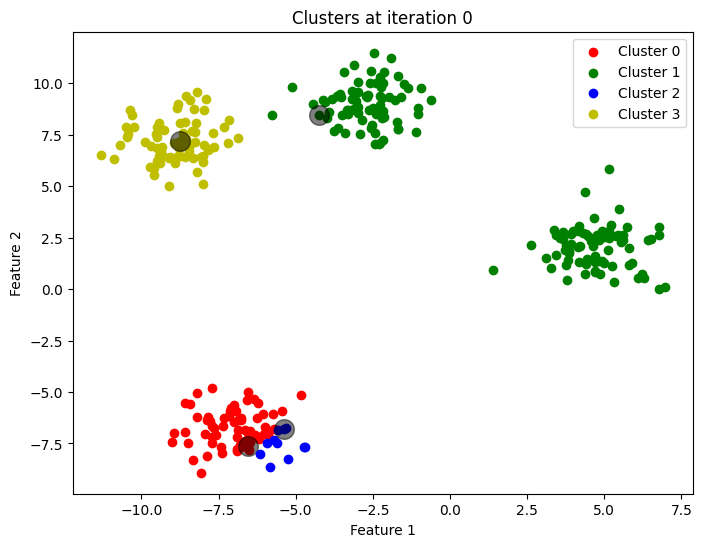

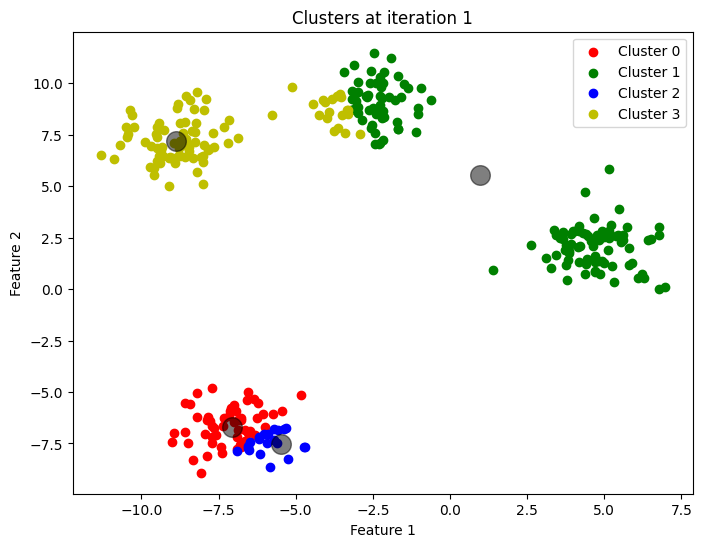

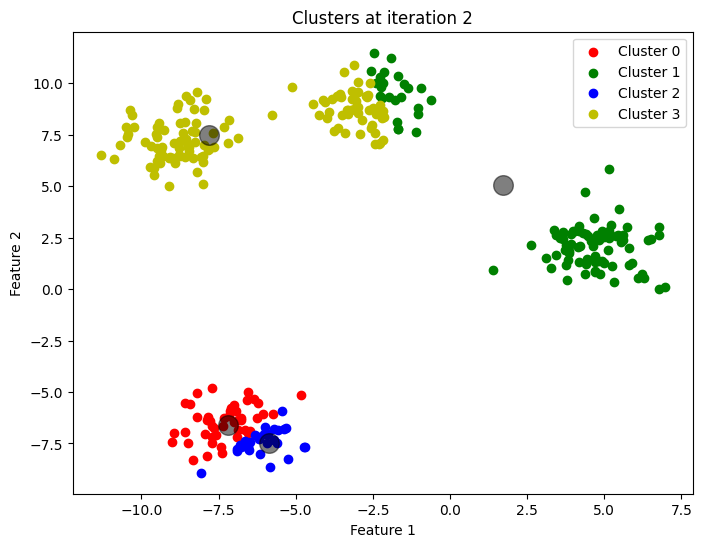

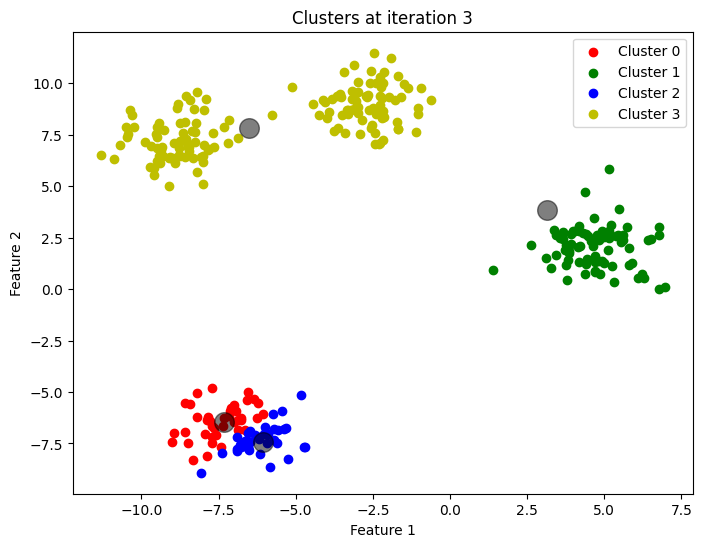

In [66]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt

# Step 1: Initialization - Randomly initialize k centroids
k = 4
random_indices = np.random.choice(len(X), k, replace=False)
centroids_random = X[random_indices]

# Step 2: Assignment - Assign each point to the nearest centroid using cosine distance
distances_iter1 = cosine_distances(X, centroids_random)
labels_iter1 = np.argmin(distances_iter1, axis=1)

# Capture current state for visualization
iteration_visualizations = []
iteration_visualizations.append((centroids_random.copy(), labels_iter1.copy()))

# Plot each iteration
plot_clusters(X, centroids_random, labels_iter1, 0)

for i in range(3):
    # Step 3: Update Centroids - Recalculate centroids
    new_centroids = []
    for j in range(k):
        cluster_points = X[labels_iter1 == j]
        centroid = cluster_points.mean(axis=0)
        new_centroids.append(centroid)

    # Step 2: Assignment - Assign each point to the nearest centroid using cosine distance
    distances_iter = cosine_distances(X, new_centroids)
    labels_iter = np.argmin(distances_iter, axis=1)
    iteration_visualizations.append((new_centroids.copy(), labels_iter.copy()))

    # Plot each iteration
    plot_clusters(X, new_centroids, labels_iter, i + 1)

    # Check for convergence (might need adjustment if using other than L2 norm)
    if np.allclose(iteration_visualizations[i][0], np.array(new_centroids)):
        break

    # Update labels for the next iteration
    labels_iter1 = labels_iter.copy()

In [ ]:
# Step 1: Initialization - Randomly initialize k centroids
k = 4
random_indices = np.random.choice(len(X), k, replace=False)
centroids = X[random_indices]

In [ ]:
centroids

array([[ -6.23425124,  -5.51147804],
       [ -2.25870477,   9.36073434],
       [ -1.98725606,   9.3112708 ],
       [-10.35351882,   8.69039718]])

In [ ]:
from sklearn.metrics.pairwise import cosine_distances

# Step 2: Assignment - Assign each point to the nearest centroid using cosine distance
distances = cosine_distances(X, centroids)
labels = np.argmin(distances, axis=1)

In [ ]:
distances.shape

(300, 4)

In [ ]:
distances[0][0]

0.7636194810022827

In [ ]:
distances[1][0]

0.7760793382106443

In [ ]:
distances[2][0]

1.488882401729585

In [ ]:
distances[3][0]

0.0008148339417939354

In [ ]:
labels[0]

3

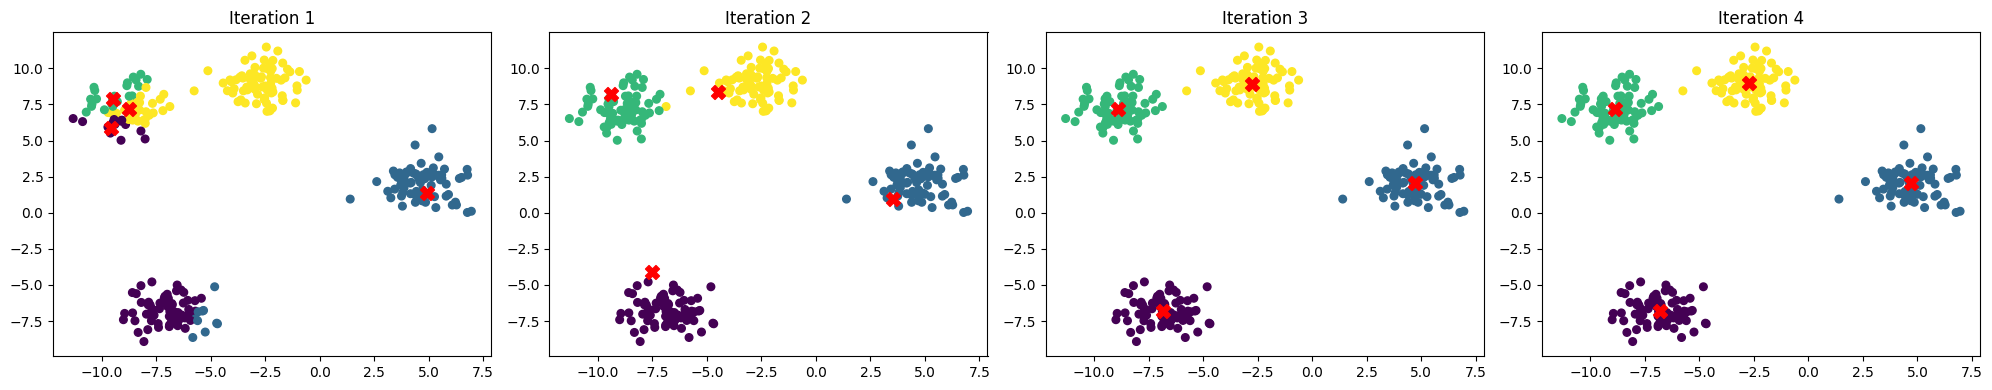

In [ ]:
# @title KMeans Clustering Process
# Modified k-means function to capture the output at each iteration for visualization
import matplotlib.pyplot as plt
def kmeans_with_visualization(X, k, max_iters=10):
    # Step 1: Initialization - Randomly initialize k centroids
    random_indices = np.random.choice(len(X), k, replace=False)
    centroids = X[random_indices]

    iteration_visualizations = []

    for i in range(max_iters):
        # Step 2: Assignment - Assign each point to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Capture current state for visualization
        iteration_visualizations.append((centroids.copy(), labels.copy()))

        # Step 3: Update Centroids - Recalculate centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return iteration_visualizations

# Run k-means algorithm and capture the output at each iteration
iteration_visualizations = kmeans_with_visualization(X, k=4)

# Plot the clusters and centroids at each iteration
fig, axes = plt.subplots(1, len(iteration_visualizations), figsize=(20, 4))
for i, (centroids, labels) in enumerate(iteration_visualizations):
    axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)
    axes[i].set_title(f"Iteration {i + 1}")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


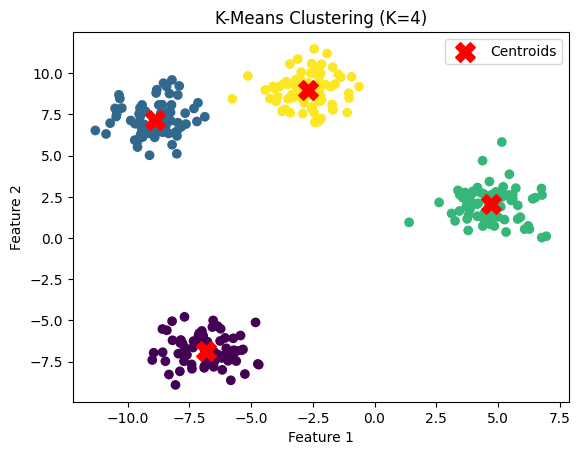

In [ ]:
from sklearn.cluster import KMeans

# Fit the K-Means model
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering (K={k})')
plt.legend()
plt.show()

###**How to find the optimal number of clusters for k-means?**

To determine the optimal number of clusters for a k-means clustering algorithm, you can use various methods and techniques, such as the elbow method, silhouette score, or the gap statistic. These methods help you assess the quality of clustering for different numbers of clusters and select the one that provides the best balance between cluster compactness and separation.

Elbow Method involves running k-means clustering with a range of different cluster numbers (k values) and plotting the within-cluster sum of squares (WCSS) or distortion for each k. The point where the WCSS starts to level off and form an "elbow" in the plot is often considered the optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

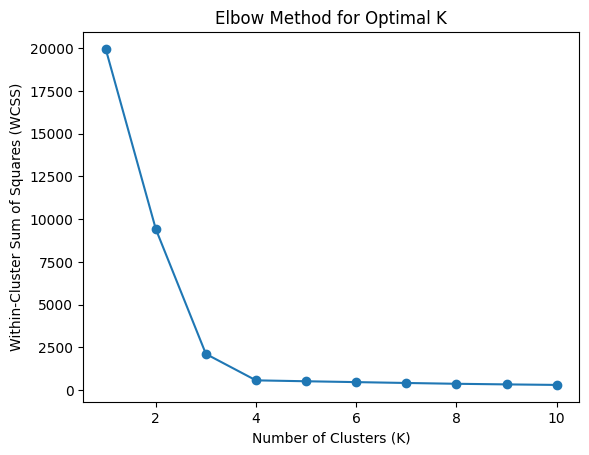

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Define a range of K values to test
k_values = range(1, 11)  # You can adjust the range as needed

# Calculate WCSS for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

We determine the number of clusters when we achieve both the highest density within clusters and the greatest separation between clusters.

##**Exercise 5: Perfrom Kmeans clustering for nba dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler


nba_data_filtered = nba.drop(columns=['Unnamed: 0', 'PLAYER', 'TEAM'])

# Standardize the data
scaler = StandardScaler()
nba_data_scaled = scaler.fit_transform(nba_data_filtered)

# Show the first few rows of the scaled data
pd.DataFrame(nba_data_scaled, columns=nba_data_filtered.columns).head()


,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,0.628930,1.104851,1.658169,0.166161,1.914619,4.502553,3.446527,3.805632,0.018697,4.876506,...,1.179173,3.146504,4.965789,3.349635,0.762053,1.690343,3.666049,2.948395,3.816974,1.529112
1,0.628930,1.066425,1.343244,0.440082,1.925595,3.175691,2.721698,3.043083,-0.017109,3.633577,...,1.810846,1.228760,2.062529,3.834294,0.021427,1.320806,2.823851,1.950662,0.429316,2.093281
2,-0.558153,0.874296,1.973094,-0.587121,1.475591,3.126548,3.084113,2.236960,1.236092,-0.219506,...,3.508468,2.244036,3.324816,1.653328,2.737057,1.813523,3.442060,4.943861,2.687755,2.939535
3,-0.320736,0.566889,1.154289,-0.244720,1.574372,3.093786,2.676397,2.541980,0.394657,0.401959,...,3.942743,1.003144,3.072359,0.199350,3.724559,1.936702,3.218071,5.342954,0.993926,1.905225
4,1.816013,0.221057,0.209514,0.166161,1.739008,3.077405,3.129415,2.803425,0.627394,1.396303,...,1.929285,3.597737,3.198587,1.653328,0.515178,-0.034165,3.065759,2.748848,4.381583,0.745543


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

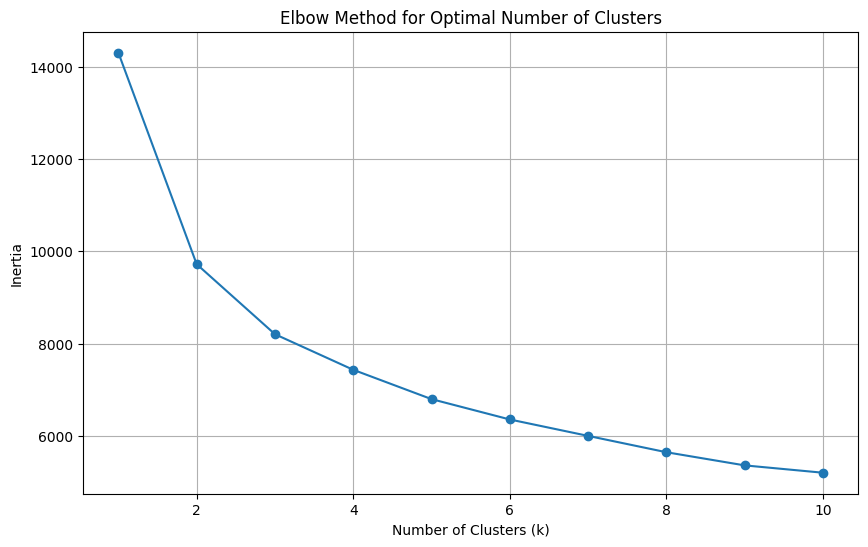

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize variables
inertia_values = []
k_range = range(1, 11)  # We will check for up to 10 clusters

# Run K-means with different k values and store the inertia (sum of squared distances)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(nba_data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
# Run K-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(nba_data_scaled)

# Add the cluster labels to the original data for interpretation
nba['Cluster'] = kmeans_labels

# Show the first few rows of the data with cluster labels
nba.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Cluster
0,1,James Harden,HOU,29,78,51,27,36.8,36.1,10.8,...,7.5,5.0,2.0,0.7,3.1,58.7,34,7,4.6,1
1,2,Paul George,OKC,29,77,46,31,36.9,28.0,9.2,...,4.1,2.7,2.2,0.4,2.8,49.3,24,1,6.4,1
2,3,Giannis Antetokounmpo,MIL,24,72,56,16,32.8,27.7,10.0,...,5.9,3.7,1.3,1.5,3.2,56.2,54,5,9.1,1
3,4,Joel Embiid,PHI,25,64,43,21,33.7,27.5,9.1,...,3.7,3.5,0.7,1.9,3.3,53.7,58,2,5.8,1
4,5,LeBron James,LAL,34,55,28,27,35.2,27.4,10.1,...,8.3,3.6,1.3,0.6,1.7,52.0,32,8,2.1,1
